### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.preprocessing import StandardScaler
from featurewiz import featurewiz
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

### Loading in the Dataset

In [2]:
df = pd.read_parquet('Fraud_data.parquet')
df.shape

(1122980, 38)

In [3]:
df.head()

,npi,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,...,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,city,state,last_name,first_name,Speciality type,Total Payment Sum,Target
0,1003000126,9798.06,544.34,150.98,1671.25,40.25,7234.67,336.0,18.67,15.0,...,5.57,11.00,30.00,CUMBERLAND,MD,ENKESHAFI,ARDALAN,INTERNAL MEDICINE,20.48,NOT_FRAUD
1,1003000142,44952.80,2809.55,833.06,6232.85,99.18,25818.67,972.0,60.75,34.5,...,26.02,11.00,105.00,TOLEDO,OH,KHALIL,RASHID,ANESTHESIOLOGY,251.31,NOT_FRAUD
2,1003000167,169.49,84.74,84.74,6.51,80.14,89.35,43.0,21.50,21.5,...,7.07,13.00,23.00,DAYTON,NV,ESCOBAR,JULIO,DENTIST,40.91,NOT_FRAUD
3,1003000282,95.03,95.03,95.03,10138.96,95.03,95.03,12.0,12.00,12.0,...,17.29,14.15,59.92,NASHVILLE,TN,BLAKEMORE,ROSIE,NURSE PRACTITIONER,0.00,NOT_FRAUD
4,1003000423,14671.45,2445.24,619.98,3704.95,172.77,9592.06,106.0,17.67,17.0,...,17.29,11.00,11.00,CLEVELAND,OH,VELOTTA,JENNIFER,OBSTETRICS & GYNECOLOGY,122.10,NOT_FRAUD


In [4]:
df['Target'].value_counts()

NOT_FRAUD    1122744
FRAUD            236
Name: Target, dtype: int64

In [5]:
df.columns

Index(['npi', 'Tot_Drug_Cst_sum', 'Tot_Drug_Cst_mean', 'Tot_Drug_Cst_median',
       'Tot_Drug_Cst_std', 'Tot_Drug_Cst_min', 'Tot_Drug_Cst_max',
       'Tot_Clms_sum', 'Tot_Clms_mean', 'Tot_Clms_median', 'Tot_Clms_std',
       'Tot_Clms_min', 'Tot_Clms_max', 'Tot_Day_Suply_sum',
       'Tot_Day_Suply_mean', 'Tot_Day_Suply_median', 'Tot_Day_Suply_std',
       'Tot_Day_Suply_min', 'Tot_Day_Suply_max', 'Tot_30day_Fills_sum',
       'Tot_30day_Fills_mean', 'Tot_30day_Fills_median', 'Tot_30day_Fills_std',
       'Tot_30day_Fills_min', 'Tot_30day_Fills_max', 'Tot_Benes_sum',
       'Tot_Benes_mean', 'Tot_Benes_median', 'Tot_Benes_std', 'Tot_Benes_min',
       'Tot_Benes_max', 'city', 'state', 'last_name', 'first_name',
       'Speciality type', 'Total Payment Sum', 'Target'],
      dtype='object')

In [6]:
df.drop(labels = ['city', 'Speciality type', 'state', 'last_name', 'first_name'], axis =1, inplace = True)

In [7]:
df.columns

Index(['npi', 'Tot_Drug_Cst_sum', 'Tot_Drug_Cst_mean', 'Tot_Drug_Cst_median',
       'Tot_Drug_Cst_std', 'Tot_Drug_Cst_min', 'Tot_Drug_Cst_max',
       'Tot_Clms_sum', 'Tot_Clms_mean', 'Tot_Clms_median', 'Tot_Clms_std',
       'Tot_Clms_min', 'Tot_Clms_max', 'Tot_Day_Suply_sum',
       'Tot_Day_Suply_mean', 'Tot_Day_Suply_median', 'Tot_Day_Suply_std',
       'Tot_Day_Suply_min', 'Tot_Day_Suply_max', 'Tot_30day_Fills_sum',
       'Tot_30day_Fills_mean', 'Tot_30day_Fills_median', 'Tot_30day_Fills_std',
       'Tot_30day_Fills_min', 'Tot_30day_Fills_max', 'Tot_Benes_sum',
       'Tot_Benes_mean', 'Tot_Benes_median', 'Tot_Benes_std', 'Tot_Benes_min',
       'Tot_Benes_max', 'Total Payment Sum', 'Target'],
      dtype='object')

In [8]:
df['Target'] = df['Target'].map({'FRAUD': 1, 'NOT_FRAUD': 0}).astype(int)

In [9]:
df.dtypes

npi                         int64
Tot_Drug_Cst_sum          float64
Tot_Drug_Cst_mean         float64
Tot_Drug_Cst_median       float64
Tot_Drug_Cst_std          float64
Tot_Drug_Cst_min          float64
Tot_Drug_Cst_max          float64
Tot_Clms_sum              float64
Tot_Clms_mean             float64
Tot_Clms_median           float64
Tot_Clms_std              float64
Tot_Clms_min              float64
Tot_Clms_max              float64
Tot_Day_Suply_sum         float64
Tot_Day_Suply_mean        float64
Tot_Day_Suply_median      float64
Tot_Day_Suply_std         float64
Tot_Day_Suply_min         float64
Tot_Day_Suply_max         float64
Tot_30day_Fills_sum       float64
Tot_30day_Fills_mean      float64
Tot_30day_Fills_median    float64
Tot_30day_Fills_std       float64
Tot_30day_Fills_min       float64
Tot_30day_Fills_max       float64
Tot_Benes_sum             float64
Tot_Benes_mean            float64
Tot_Benes_median          float64
Tot_Benes_std             float64
Tot_Benes_min 

### Dealing with Data Imbalance

In [10]:
df['Target'].value_counts()

0    1122744
1        236
Name: Target, dtype: int64

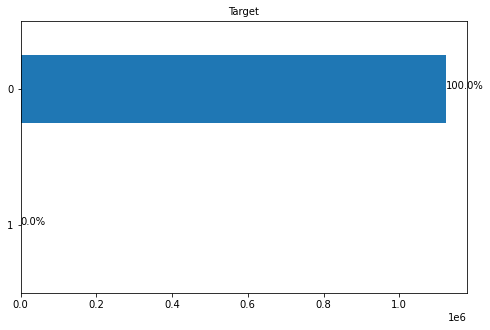

In [11]:
ax = df["Target"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Target", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Oversampling

In [12]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [13]:
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Target', axis=1), df['Target'])

oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [14]:
oversampled['Target'].value_counts()

0    1122744
1    1122744
Name: Target, dtype: int64

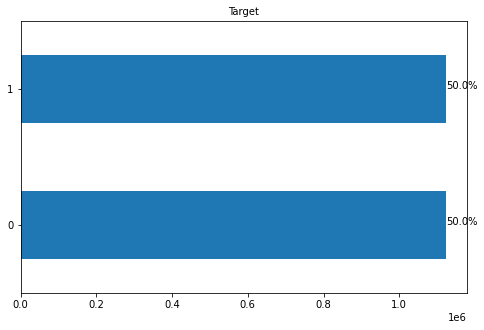

In [15]:
ax = oversampled["Target"].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title("Target", fontdict={'size': 10})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/oversampled.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [16]:
oversampled.shape

(2245488, 33)

In [17]:
oversampled.head(10)

,Target,npi,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,...,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
0,0,1003000126,9798.06,544.34,150.98,1671.25,40.25,7234.67,336.0,18.67,...,10.70,12.0,50.0,181.0,15.08,13.50,5.57,11.00,30.00,20.48
1,0,1003000142,44952.80,2809.55,833.06,6232.85,99.18,25818.67,972.0,60.75,...,68.81,14.0,284.5,414.0,31.85,30.00,26.02,11.00,105.00,251.31
2,0,1003000167,169.49,84.74,84.74,6.51,80.14,89.35,43.0,21.50,...,10.61,14.0,29.0,36.0,18.00,18.00,7.07,13.00,23.00,40.91
3,0,1003000282,95.03,95.03,95.03,10138.96,95.03,95.03,12.0,12.00,...,60.71,14.0,14.0,0.0,25.31,21.12,17.29,14.15,59.92,0.00
4,0,1003000423,14671.45,2445.24,619.98,3704.95,172.77,9592.06,106.0,17.67,...,15.99,13.0,53.5,11.0,11.00,11.00,17.29,11.00,11.00,122.10
5,0,1003000522,201025.29,2209.07,678.87,5495.42,103.04,38210.06,4712.0,51.78,...,183.27,11.0,1257.8,1300.0,28.26,19.00,23.58,11.00,143.00,240.38
6,0,1003000522,201025.29,2209.07,678.87,5495.42,103.04,38210.06,4712.0,51.78,...,183.27,11.0,1257.8,1300.0,28.26,19.00,23.58,11.00,143.00,80.72
7,0,1003000522,201025.29,2209.07,678.87,5495.42,103.04,38210.06,4712.0,51.78,...,183.27,11.0,1257.8,1300.0,28.26,19.00,23.58,11.00,143.00,21.30
8,0,1003000530,251485.92,2350.34,798.45,3889.58,39.77,20687.93,5897.0,55.11,...,139.91,11.0,654.7,1029.0,28.58,19.50,18.02,12.00,72.00,0.00
9,0,1003000597,100145.60,5007.28,850.42,14063.88,46.70,63754.89,1422.0,71.10,...,208.94,11.0,927.2,647.0,49.77,31.00,50.49,11.00,142.00,720.60


### Shuffling the Dataset

In [18]:
# Shuffling a Pandas dataframe with .shuffle()
df_new = oversampled.sample(frac=1, random_state=1).reset_index()

In [19]:
df_new.head(10)

,index,Target,npi,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,...,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
0,1528976,1,1712803439,1.876849e+03,1438.684935,1414.363075,2958.333698,1271.553824,1630.130647,45.780770,...,28.844733,19.931563,43.164385,0.000000,25.310000,21.120000,17.290000,14.150000,59.920000,0.000000
1,1632869,1,1477040842,1.644307e+05,1630.492909,467.321451,3489.554784,34.974082,22305.915037,3305.925410,...,59.503278,11.000000,265.708806,952.459481,22.596633,20.364523,12.958194,11.379336,53.940749,10.961929
2,1467053,1,1436364689,2.594246e+04,801.252679,194.258726,2620.659771,41.078258,14918.461280,833.254580,...,15.489857,11.000000,72.106799,742.152127,23.752800,18.208631,13.096209,11.029804,60.546725,0.000000
3,1205790,1,1927711963,1.462940e+02,119.037323,119.037323,5685.323697,113.876368,124.193879,20.319937,...,33.998865,29.872702,29.872702,18.639875,13.800104,13.800104,9.682760,13.800104,13.800104,0.000000
4,1210282,1,1638667288,2.282289e+05,1842.352277,770.967213,3403.142045,74.626677,21181.450423,6006.575455,...,61.849998,11.095941,277.430988,803.512889,21.301956,18.625683,9.683284,11.151107,43.811661,0.000000
5,1891959,1,1682656767,1.785224e+04,937.441399,316.883299,1764.678378,33.183158,6874.885638,566.599871,...,39.628643,11.000000,178.766724,48.618291,27.283465,25.230915,17.785443,22.769085,33.847316,103.840704
6,285763,0,1255447421,1.782543e+06,7158.810000,2212.360000,15862.760000,19.440000,113976.890000,19952.000000,...,156.150000,11.000000,1683.200000,3210.000000,29.720000,22.000000,28.040000,11.000000,231.000000,421.680000
7,1714065,1,1116452438,3.870839e+05,4014.526468,1025.763379,9086.130712,65.840580,57243.087347,7115.276469,...,235.265083,11.000000,1323.824674,1524.242285,41.828873,32.454683,36.266027,11.795412,152.183159,12.781949
8,987784,0,1871984914,1.287160e+03,429.050000,364.860000,175.100000,295.110000,627.190000,195.000000,...,20.220000,50.000000,88.000000,186.000000,62.000000,56.000000,16.820000,49.000000,81.000000,0.000000
9,633765,0,1568535425,1.280800e+03,256.160000,166.640000,216.110000,89.960000,631.900000,95.000000,...,8.640000,12.000000,31.300000,76.000000,19.000000,20.000000,6.680000,11.000000,25.000000,0.000000


In [20]:
df_new.drop(labels = ['index'], axis = 1, inplace = True)

In [21]:
df_new.head()

,Target,npi,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,...,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
0,1,1712803439,1876.848693,1438.684935,1414.363075,2958.333698,1271.553824,1630.130647,45.780770,19.643846,...,28.844733,19.931563,43.164385,0.000000,25.310000,21.120000,17.290000,14.150000,59.920000,0.000000
1,1,1477040842,164430.674344,1630.492909,467.321451,3489.554784,34.974082,22305.915037,3305.925410,33.065058,...,59.503278,11.000000,265.708806,952.459481,22.596633,20.364523,12.958194,11.379336,53.940749,10.961929
2,1,1436364689,25942.457546,801.252679,194.258726,2620.659771,41.078258,14918.461280,833.254580,25.348510,...,15.489857,11.000000,72.106799,742.152127,23.752800,18.208631,13.096209,11.029804,60.546725,0.000000
3,1,1927711963,146.294033,119.037323,119.037323,5685.323697,113.876368,124.193879,20.319937,15.480167,...,33.998865,29.872702,29.872702,18.639875,13.800104,13.800104,9.682760,13.800104,13.800104,0.000000
4,1,1638667288,228228.897807,1842.352277,770.967213,3403.142045,74.626677,21181.450423,6006.575455,48.826272,...,61.849998,11.095941,277.430988,803.512889,21.301956,18.625683,9.683284,11.151107,43.811661,0.000000


### Scaling and Transformation

In [22]:
X = df_new.drop(labels = ['npi', 'Target'], axis = 1)
y = df_new['Target']

In [23]:
npi = df_new['npi']
npi_df = pd.DataFrame(npi, columns = ['npi'])
npi_df.head()

,npi
0,1712803439
1,1477040842
2,1436364689
3,1927711963
4,1638667288


In [24]:
feature_names = X.columns.to_list()

In [25]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

In [26]:
X_df = pd.DataFrame(X_scaled, columns=feature_names)

In [27]:
X_df.head()

,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,Tot_Clms_std,...,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
0,-0.317309,-0.227162,-0.021360,-0.265648,0.113900,-0.280852,-0.539220,-0.528596,-0.313092,-0.323452,...,-0.359437,0.551670,-0.442177,-0.530789,0.024439,0.079069,0.000121,0.131756,-0.014349,-0.018311
1,-0.116470,-0.216518,-0.113193,-0.250141,-0.055166,-0.174498,0.359306,-0.106442,-0.093931,-0.132144,...,-0.040327,-0.332909,-0.042461,0.605377,-0.113222,0.002673,-0.079206,-0.317889,-0.036898,-0.017865
2,-0.287575,-0.262534,-0.139672,-0.275505,-0.054332,-0.212498,-0.322185,-0.349160,-0.470435,-0.315031,...,-0.498442,-0.332909,-0.390193,0.354506,-0.054565,-0.215337,-0.076679,-0.374613,-0.011985,-0.018311
3,-0.319447,-0.300391,-0.146966,-0.186046,-0.044379,-0.288598,-0.546238,-0.659561,-0.619631,-0.260704,...,-0.305791,1.536238,-0.466050,-0.508554,-0.559511,-0.661139,-0.139188,0.074972,-0.188274,-0.018311
4,-0.037646,-0.204762,-0.083749,-0.252664,-0.049745,-0.180282,1.103631,0.389314,0.326286,0.187787,...,-0.015901,-0.323407,-0.021406,0.427702,-0.178907,-0.173163,-0.139179,-0.354927,-0.075096,-0.018311


In [28]:
X_df.describe()

,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,Tot_Clms_std,...,Tot_30day_Fills_std,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum
count,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,...,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06,2.245488e+06
mean,1.958045e-16,-2.909586e-17,-1.197598e-16,-2.202362e-17,4.350219e-17,-1.595407e-16,2.512670e-16,-9.821395e-17,-1.949636e-16,8.150242e-17,...,-2.296160e-16,-1.894886e-16,2.991700e-17,-3.123778e-16,-9.256407e-17,1.057181e-16,-4.411606e-17,-1.073640e-16,-8.002815e-17,-4.556611e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.196277e-01,-3.069966e-01,-1.585091e-01,-3.520031e-01,-5.994779e-02,-2.892371e-01,-5.488062e-01,-8.004813e-01,-9.494717e-01,-5.093306e-01,...,-6.596690e-01,-3.329090e-01,-4.999478e-01,-5.307886e-01,-7.015731e-01,-9.442927e-01,-3.165052e-01,-3.794500e-01,-1.988341e-01,-1.831079e-02
25%,-3.163056e-01,-2.850586e-01,-1.370312e-01,-3.204698e-01,-5.334822e-02,-2.838244e-01,-5.228989e-01,-5.428713e-01,-5.445489e-01,-3.573829e-01,...,-4.604263e-01,-3.329090e-01,-4.447496e-01,-4.961952e-01,-3.485028e-01,-4.386794e-01,-1.416524e-01,-3.794500e-01,-1.371089e-01,-1.831079e-02
50%,-2.793119e-01,-2.211515e-01,-1.098478e-01,-2.199528e-01,-5.045604e-02,-2.373364e-01,-4.051712e-01,-2.429701e-01,-2.132485e-01,-1.316422e-01,...,-1.601632e-01,-2.420619e-01,-3.077631e-01,-3.625665e-01,-8.007821e-02,-9.994516e-02,-1.253884e-02,-2.171625e-01,-5.141822e-02,-1.831079e-02
75%,-7.471622e-02,-8.487867e-02,-5.063000e-02,-5.604192e-02,-4.309422e-02,-9.869066e-02,1.082464e-01,2.689620e-01,2.593315e-01,9.024312e-02,...,1.092098e-01,-3.578986e-02,1.238425e-01,8.628189e-02,1.101807e-01,1.174952e-01,5.025747e-03,1.089025e-01,1.491496e-02,-1.670180e-02
max,4.820928e+01,1.988294e+02,3.478253e+02,1.410704e+02,4.905767e+02,1.717077e+02,1.274505e+02,2.216179e+02,1.197911e+02,3.387103e+02,...,2.861953e+02,3.009756e+02,3.672674e+02,2.404228e+02,3.211948e+02,5.452192e+02,3.910742e+02,2.019930e+02,5.347406e+02,7.453930e+02


In [29]:
round(X_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Tot_Drug_Cst_sum,2245488.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,48.0
Tot_Drug_Cst_mean,2245488.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,199.0
Tot_Drug_Cst_median,2245488.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,348.0
Tot_Drug_Cst_std,2245488.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,141.0
Tot_Drug_Cst_min,2245488.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,491.0
Tot_Drug_Cst_max,2245488.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,172.0
Tot_Clms_sum,2245488.0,0.0,1.0,-1.0,-1.0,-0.0,0.0,127.0
Tot_Clms_mean,2245488.0,-0.0,1.0,-1.0,-1.0,-0.0,0.0,222.0
Tot_Clms_median,2245488.0,-0.0,1.0,-1.0,-1.0,-0.0,0.0,120.0
Tot_Clms_std,2245488.0,0.0,1.0,-1.0,-0.0,-0.0,0.0,339.0


In [30]:
y_df = pd.DataFrame(y, columns=['Target'])
y_df.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [31]:
df_new = pd.concat([X_df, y_df], axis =1)
df_new.head()

,Tot_Drug_Cst_sum,Tot_Drug_Cst_mean,Tot_Drug_Cst_median,Tot_Drug_Cst_std,Tot_Drug_Cst_min,Tot_Drug_Cst_max,Tot_Clms_sum,Tot_Clms_mean,Tot_Clms_median,Tot_Clms_std,...,Tot_30day_Fills_min,Tot_30day_Fills_max,Tot_Benes_sum,Tot_Benes_mean,Tot_Benes_median,Tot_Benes_std,Tot_Benes_min,Tot_Benes_max,Total Payment Sum,Target
0,-0.317309,-0.227162,-0.021360,-0.265648,0.113900,-0.280852,-0.539220,-0.528596,-0.313092,-0.323452,...,0.551670,-0.442177,-0.530789,0.024439,0.079069,0.000121,0.131756,-0.014349,-0.018311,1
1,-0.116470,-0.216518,-0.113193,-0.250141,-0.055166,-0.174498,0.359306,-0.106442,-0.093931,-0.132144,...,-0.332909,-0.042461,0.605377,-0.113222,0.002673,-0.079206,-0.317889,-0.036898,-0.017865,1
2,-0.287575,-0.262534,-0.139672,-0.275505,-0.054332,-0.212498,-0.322185,-0.349160,-0.470435,-0.315031,...,-0.332909,-0.390193,0.354506,-0.054565,-0.215337,-0.076679,-0.374613,-0.011985,-0.018311,1
3,-0.319447,-0.300391,-0.146966,-0.186046,-0.044379,-0.288598,-0.546238,-0.659561,-0.619631,-0.260704,...,1.536238,-0.466050,-0.508554,-0.559511,-0.661139,-0.139188,0.074972,-0.188274,-0.018311,1
4,-0.037646,-0.204762,-0.083749,-0.252664,-0.049745,-0.180282,1.103631,0.389314,0.326286,0.187787,...,-0.323407,-0.021406,0.427702,-0.178907,-0.173163,-0.139179,-0.354927,-0.075096,-0.018311,1


### Feature Importnace and Selection

In [32]:
np.random.seed(1234)

Imported 0.1.996 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Caution: We will try to reduce the memory usage of dataframe from 548.21 MB
        memory usage after optimization is: 134.91 MB
        decreased by 75.4%
    Loaded train data. Shape = (2245488, 32)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Sing

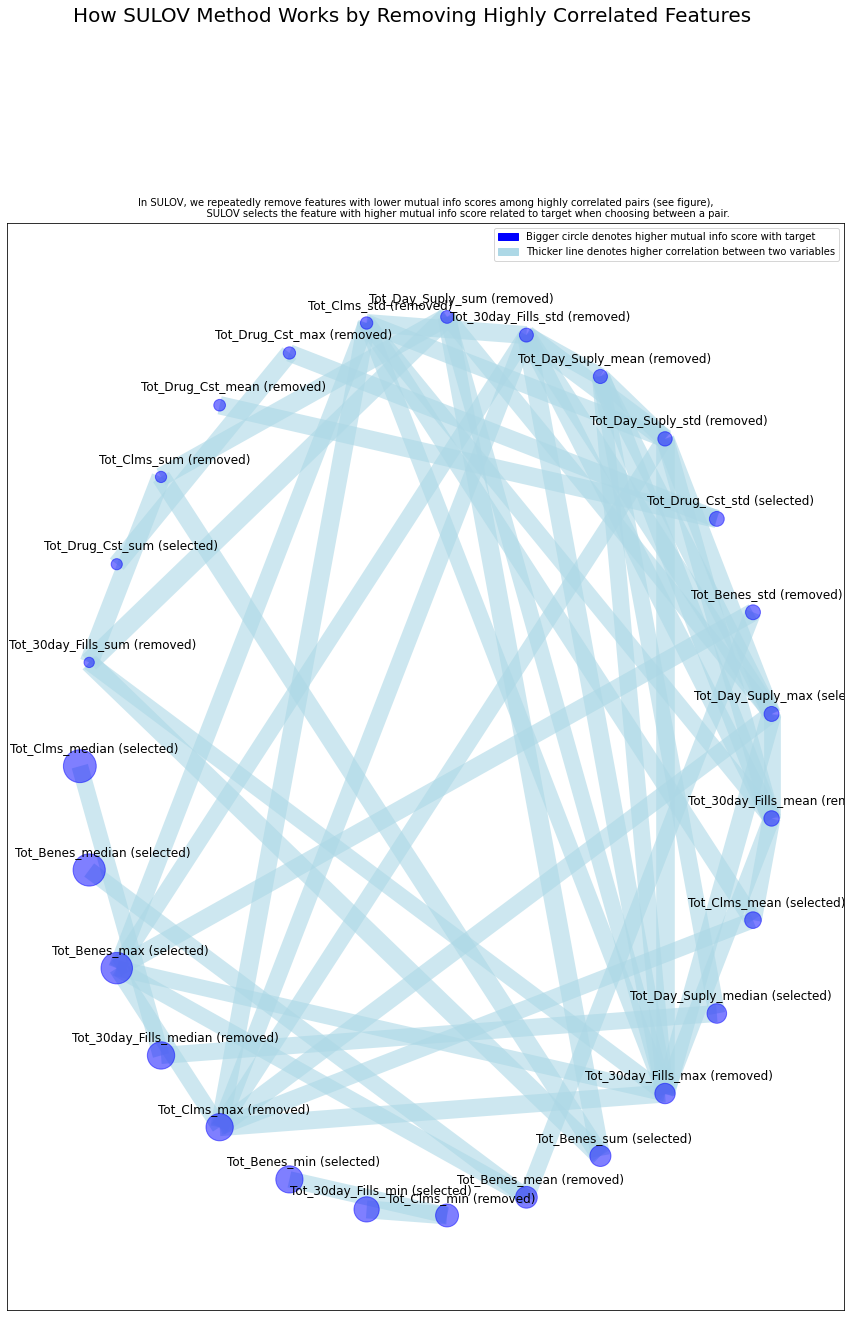

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 15
Final list of selected 15 vars after SULOV = ['Tot_Day_Suply_min', 'Tot_Drug_Cst_median', 'Tot_Drug_Cst_min', 'TotalPaymentSum', 'Tot_Clms_median', 'Tot_Benes_median', 'Tot_Benes_max', 'Tot_Benes_min', 'Tot_30day_Fills_min', 'Tot_Benes_sum', 'Tot_Day_Suply_median', 'Tot_Clms_mean', 'Tot_Day_Suply_max', 'Tot_Drug_Cst_std', 'Tot_Drug_Cst_sum']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 15 
    Taking top 7 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 20
     

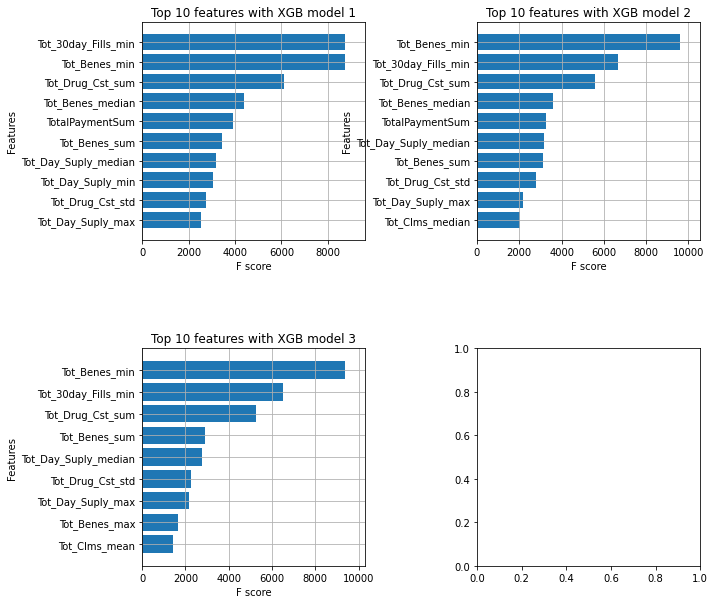

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 9 important features:
['Tot_30day_Fills_min', 'Tot_Benes_min', 'Tot_Drug_Cst_sum', 'Tot_Benes_median', 'TotalPaymentSum', 'Tot_Benes_sum', 'Tot_Day_Suply_median', 'Tot_Drug_Cst_std', 'Tot_Day_Suply_max']
Total Time taken for featurewiz selection = 48 seconds
Output contains a list of 9 important features and a train dataframe


In [33]:
# automatic feature selection by using featurewiz package
target = ['Target']
 
features, df_sel = featurewiz(df_new, target, corr_limit=0.8, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [34]:
features

['Tot_30day_Fills_min',
 'Tot_Benes_min',
 'Tot_Drug_Cst_sum',
 'Tot_Benes_median',
 'Total Payment Sum',
 'Tot_Benes_sum',
 'Tot_Day_Suply_median',
 'Tot_Drug_Cst_std',
 'Tot_Day_Suply_max']

In [35]:
df_sel.head()

,Tot_30day_Fills_min,Tot_Benes_min,Tot_Drug_Cst_sum,Tot_Benes_median,Total Payment Sum,Tot_Benes_sum,Tot_Day_Suply_median,Tot_Drug_Cst_std,Tot_Day_Suply_max,Target
0,0.551758,0.131714,-0.317383,0.079041,-0.018311,-0.530762,-0.075256,-0.265625,-0.554688,1
1,-0.333008,-0.317871,-0.116455,0.002672,-0.017868,0.605469,0.360840,-0.250244,-0.012131,1
2,-0.333008,-0.374512,-0.287598,-0.215332,-0.018311,0.354492,-0.572754,-0.275391,-0.488281,1
3,1.536133,0.074951,-0.319336,-0.661133,-0.018311,-0.508789,-0.028824,-0.186035,-0.596191,1
4,-0.323486,-0.354980,-0.037659,-0.173218,-0.018311,0.427734,-0.024689,-0.252686,-0.027084,1


In [36]:
npi_df.head()

,npi
0,1712803439
1,1477040842
2,1436364689
3,1927711963
4,1638667288


In [37]:
df_sel = pd.concat([npi_df, df_sel], axis =1)
df_sel.head()

,npi,Tot_30day_Fills_min,Tot_Benes_min,Tot_Drug_Cst_sum,Tot_Benes_median,Total Payment Sum,Tot_Benes_sum,Tot_Day_Suply_median,Tot_Drug_Cst_std,Tot_Day_Suply_max,Target
0,1712803439,0.551758,0.131714,-0.317383,0.079041,-0.018311,-0.530762,-0.075256,-0.265625,-0.554688,1
1,1477040842,-0.333008,-0.317871,-0.116455,0.002672,-0.017868,0.605469,0.360840,-0.250244,-0.012131,1
2,1436364689,-0.333008,-0.374512,-0.287598,-0.215332,-0.018311,0.354492,-0.572754,-0.275391,-0.488281,1
3,1927711963,1.536133,0.074951,-0.319336,-0.661133,-0.018311,-0.508789,-0.028824,-0.186035,-0.596191,1
4,1638667288,-0.323486,-0.354980,-0.037659,-0.173218,-0.018311,0.427734,-0.024689,-0.252686,-0.027084,1


In [38]:
df_sel.shape

(2245488, 11)

In [39]:
df_sel['npi'] = df_sel['npi'].astype('object')

In [40]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245488 entries, 0 to 2245487
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   npi                   object 
 1   Tot_30day_Fills_min   float16
 2   Tot_Benes_min         float16
 3   Tot_Drug_Cst_sum      float16
 4   Tot_Benes_median      float16
 5   Total Payment Sum     float16
 6   Tot_Benes_sum         float16
 7   Tot_Day_Suply_median  float16
 8   Tot_Drug_Cst_std      float16
 9   Tot_Day_Suply_max     float16
 10  Target                int8   
dtypes: float16(9), int8(1), object(1)
memory usage: 57.8+ MB


In [41]:
df_sel.head()

,npi,Tot_30day_Fills_min,Tot_Benes_min,Tot_Drug_Cst_sum,Tot_Benes_median,Total Payment Sum,Tot_Benes_sum,Tot_Day_Suply_median,Tot_Drug_Cst_std,Tot_Day_Suply_max,Target
0,1712803439,0.551758,0.131714,-0.317383,0.079041,-0.018311,-0.530762,-0.075256,-0.265625,-0.554688,1
1,1477040842,-0.333008,-0.317871,-0.116455,0.002672,-0.017868,0.605469,0.360840,-0.250244,-0.012131,1
2,1436364689,-0.333008,-0.374512,-0.287598,-0.215332,-0.018311,0.354492,-0.572754,-0.275391,-0.488281,1
3,1927711963,1.536133,0.074951,-0.319336,-0.661133,-0.018311,-0.508789,-0.028824,-0.186035,-0.596191,1
4,1638667288,-0.323486,-0.354980,-0.037659,-0.173218,-0.018311,0.427734,-0.024689,-0.252686,-0.027084,1


### Splitting The Dataset

In [42]:
df_sel = df_sel.iloc[:50000]

In [43]:
X = df_sel.drop(['npi', 'Target'], axis =1)
y = df_sel['Target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=12, stratify= y)

In [45]:
X_train.shape

(35000, 9)

In [46]:
X_test.shape

(15000, 9)

### 1. Random Forest Model

In [47]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [48]:
## Instantiating the model

rf = RandomForestClassifier(n_estimators = 1000)

## Training the model with the the train dataset
model_rf = rf.fit(X_train, y_train)

In [49]:
## Predicitng the the target variables of the test data 
Y_pred_rf = rf.predict(X_test)

In [50]:
# Calculating and viewing the accuracy score for the decision tree model

print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_rf)*100))

Random Forest Model accuracy score: 98.8800


In [51]:
# Calculating and viewing the precision score for the decision tree model

precision_rf = precision_score(y_test, Y_pred_rf, pos_label=1)
print('Random Forest Model Precision score: {0:0.4f}'.format(precision_rf*100))

Random Forest Model Precision score: 99.0003


In [52]:
# Calculating and viewing the recall score for the decision tree model

recall_rf = recall_score(y_test, Y_pred_rf, pos_label=1)
print('Random Forest Model Precision score: {0:0.4f}'.format(recall_rf*100))

Random Forest Model Precision score: 98.7633


In [53]:
# Calculating and viewing the precision score for the decision tree model

f1_score_rf = f1_score(y_test, Y_pred_rf, pos_label=1)
print('Random Forest Model Precision score: {0:0.4f}'.format(f1_score_rf*100))

Random Forest Model Precision score: 98.8816


In [54]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, Y_pred_rf)
print('Confusion matrix\n\n', cm_rf)
print('\nTrue Positives(TP) = ', cm_rf[1,1])
print('\nTrue Negatives(TN) = ', cm_rf[0,0])
print('\nFalse Positives(FP) = ', cm_rf[0,1])
print('\nFalse Negatives(FN) = ', cm_rf[1,0])

Confusion matrix

 [[7405   75]
 [  93 7427]]

True Positives(TP) =  7427

True Negatives(TN) =  7405

False Positives(FP) =  75

False Negatives(FN) =  93


<AxesSubplot:>

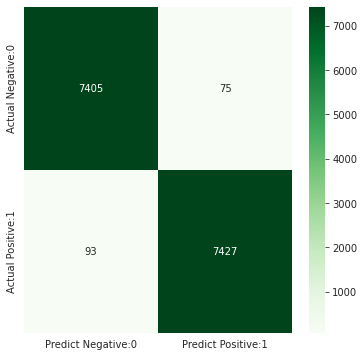

In [55]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_rf_matrix = pd.DataFrame(data=cm_rf, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap=plt.cm.Greens)

In [56]:
## Viewing the classification report of the model

print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7480
           1       0.99      0.99      0.99      7520

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



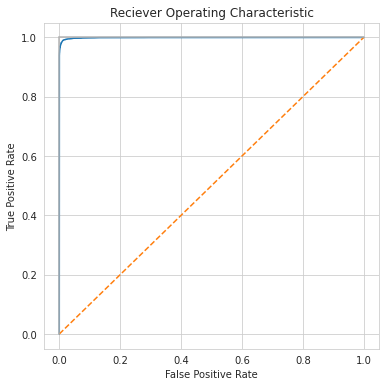

In [57]:
# get predicted probabilities
Y_probabilities = model_rf.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [58]:
# calculate area under curve
roc_auc_rf = roc_auc_score(y_test, Y_probabilities)
roc_auc_rf

0.9992618791955854

### 2. Decision Tree Model

In [59]:
## Inputting the decision tress classifier

class_tree = DecisionTreeClassifier(splitter='best', random_state=123, min_samples_split=30, min_samples_leaf=10)

# Use the trainning data to train the estimator
model_dtc=class_tree.fit(X_train, y_train)

Y_pred_dtc =model_dtc.predict(X_test)

In [60]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy = accuracy_score(y_test, Y_pred_dtc)
print('DecisionTreeClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_dtc)*100))

DecisionTreeClassifier Model accuracy score: 94.9533


In [61]:
# Calculating and viewing the precision score for the decision tree model

precision_dtc = precision_score(y_test, Y_pred_dtc, average='binary', pos_label=1)
print('Decision Tree Classifier Model Precision score: {0:0.4f}'.format(precision_dtc*100))

Decision Tree Classifier Model Precision score: 94.6285


In [62]:
# Calculating and viewing the recall score for the decision tree model

recall_dtc = recall_score(y_test, Y_pred_dtc,pos_label=1)
print('Decision Tree Classifier Model Recall score: {0:0.4f}'.format(recall_dtc*100))

Decision Tree Classifier Model Recall score: 95.3457


In [63]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_dtc = f1_score(y_test, Y_pred_dtc,  pos_label=1)
print('DecisionTree Classifier Model f1_score: {0:0.4f}'.format(f1_score_dtc*100))

DecisionTree Classifier Model f1_score: 94.9858


In [64]:
#Classification Metrices for the decision tree model

print(classification_report(y_test, Y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7480
           1       0.95      0.95      0.95      7520

    accuracy                           0.95     15000
   macro avg       0.95      0.95      0.95     15000
weighted avg       0.95      0.95      0.95     15000



In [65]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm_dtc = confusion_matrix(y_test, Y_pred_dtc)
print('Confusion matrix\n\n', cm_dtc)
print('\nTrue Positives(TP) = ', cm_dtc[1,1])
print('\nTrue Negatives(TN) = ', cm_dtc[0,0])
print('\nFalse Positives(FP) = ', cm_dtc[0,1])
print('\nFalse Negatives(FN) = ', cm_dtc[1,0])

Confusion matrix

 [[7073  407]
 [ 350 7170]]

True Positives(TP) =  7170

True Negatives(TN) =  7073

False Positives(FP) =  407

False Negatives(FN) =  350


<AxesSubplot:>

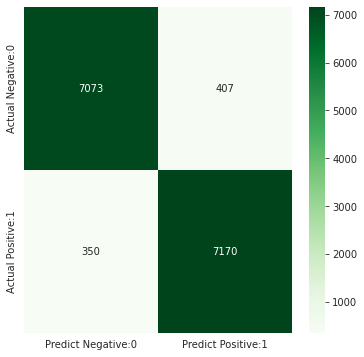

In [66]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_dtc_matrix = pd.DataFrame(data=cm_dtc, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_dtc_matrix, annot=True, fmt='d', cmap=plt.cm.Greens)

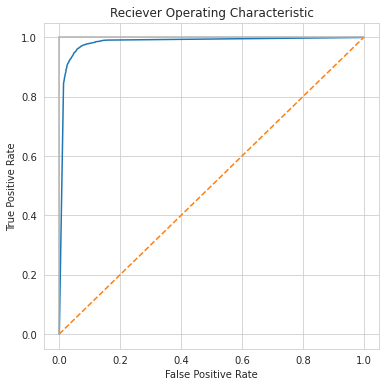

In [67]:
# get predicted probabilities
Y_probabilities = model_dtc.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [68]:
# calculate area under curve
roc_auc_dtc = roc_auc_score(y_test, Y_probabilities)
roc_auc_dtc

0.9828502247127091

### 3. LIGHT GRADIENT BOASTING MACHINE MODEL

In [70]:
## Instantiating the model

model_lgb = lgb.LGBMClassifier(n_estimators=1000)

## Training the model with the train dataset
model_lgb.fit(X_train, y_train)

LGBMClassifier(n_estimators=1000)

In [71]:
# predictng the results of test dataset
Y_pred_lgb=model_lgb.predict(X_test)

In [72]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy = accuracy_score(Y_pred_lgb, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_lgb)*100))

LightGBM Model accuracy score: 99.5933


In [73]:
# Calculating and viewing the precision score for the decision tree model

precision_lgb = precision_score(y_test, Y_pred_lgb, pos_label=1)
print('LightGBM Model Precision score: {0:0.4f}'.format(precision_lgb*100))

LightGBM Model Precision score: 99.6406


In [74]:
# Calculating and viewing the recall score for the decision tree model

recall_lgb = recall_score(y_test, Y_pred_lgb, pos_label=1)
print('LightGBM Model Recall score: {0:0.4f}'.format(recall_lgb*100))

LightGBM Model Recall score: 99.5479


In [75]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_lgb = f1_score(y_test, Y_pred_lgb, pos_label=1)
print('LightGBM Model f1 score: {0:0.4f}'.format(f1_score_lgb*100))

LightGBM Model f1 score: 99.5942


In [76]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm_lgb = confusion_matrix(y_test, Y_pred_lgb)
print('Confusion matrix\n\n', cm_lgb)
print('\nTrue Positives(TP) = ', cm_lgb[1,1])
print('\nTrue Negatives(TN) = ', cm_lgb[0,0])
print('\nFalse Positives(FP) = ', cm_lgb[0,1])
print('\nFalse Negatives(FN) = ', cm_lgb[1,0])

Confusion matrix

 [[7453   27]
 [  34 7486]]

True Positives(TP) =  7486

True Negatives(TN) =  7453

False Positives(FP) =  27

False Negatives(FN) =  34


<AxesSubplot:>

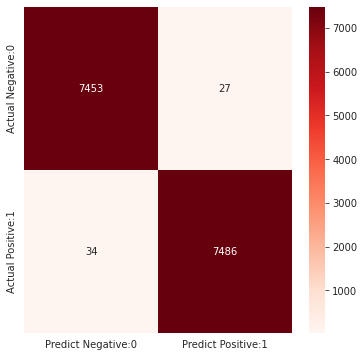

In [77]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_lgb_matrix = pd.DataFrame(data=cm_lgb, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_lgb_matrix, annot=True, fmt='d', cmap=plt.cm.Reds)

In [78]:
#Classification Metrices

## Viewing the classification report of the model
print(classification_report(y_test, Y_pred_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7480
           1       1.00      1.00      1.00      7520

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



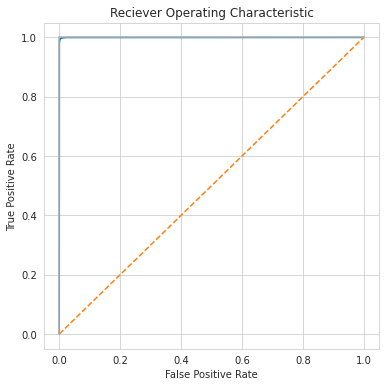

In [79]:
# get predicted probabilities
Y_probabilities = model_lgb.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [80]:
# calculate area under curve
roc_auc_lgb = roc_auc_score(y_test, Y_probabilities)
roc_auc_lgb

0.9999001948458301

### 4. Logistic  Regression

In [82]:
## Instantiating the model
logistic_regression = LogisticRegression(max_iter=1000)

## Training the model with the training dataset
model_lgr = logistic_regression.fit(X_train, y_train)

# predict the results
Y_pred_lgr=model_lgr.predict(X_test)

In [83]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy=accuracy_score(Y_pred_lgr, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_lgr)*100))

Logistic Regression Model accuracy score: 58.9000


In [84]:
# Calculating and viewing the precision score for the decision tree model

precision_lgr = precision_score(y_test, Y_pred_lgr, pos_label=1)
print('Logistic Regression Model Precision score: {0:0.4f}'.format(precision_lgr*100))

Logistic Regression Model Precision score: 57.5203


In [85]:
# Calculating and viewing the precision score for the decision tree model

recall_lgr = recall_score(y_test, Y_pred_lgr, pos_label=1)
print('Logistic Regression Model Recall score: {0:0.4f}'.format(recall_lgr*100))

Logistic Regression Model Recall score: 68.9096


In [86]:
# Calculating and viewing the precision score for the decision tree model

f1_score_lgr = f1_score(y_test, Y_pred_lgr, pos_label=1)
print('Logistic Regression Model f1 score: {0:0.4f}'.format(f1_score_lgr*100))

Logistic Regression Model f1 score: 62.7019


In [87]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm_lgr = confusion_matrix(y_test, Y_pred_lgr)
print('Confusion matrix\n\n', cm_lgr)
print('\nTrue Positives(TP) = ', cm_lgr[1,1])
print('\nTrue Negatives(TN) = ', cm_lgr[0,0])
print('\nFalse Positives(FP) = ', cm_lgr[0,1])
print('\nFalse Negatives(FN) = ', cm_lgr[1,0])

Confusion matrix

 [[3653 3827]
 [2338 5182]]

True Positives(TP) =  5182

True Negatives(TN) =  3653

False Positives(FP) =  3827

False Negatives(FN) =  2338


<AxesSubplot:>

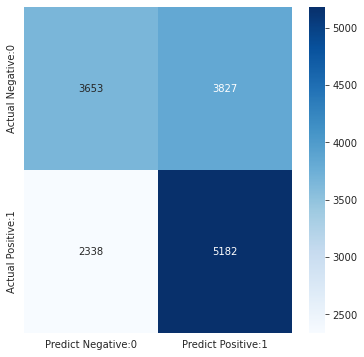

In [88]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_lgr_matrix = pd.DataFrame(data=cm_lgr, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_lgr_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)

In [89]:
#Classification Metrices

## Viewing the classification report of the model

print(classification_report(y_test, Y_pred_lgr))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54      7480
           1       0.58      0.69      0.63      7520

    accuracy                           0.59     15000
   macro avg       0.59      0.59      0.58     15000
weighted avg       0.59      0.59      0.58     15000



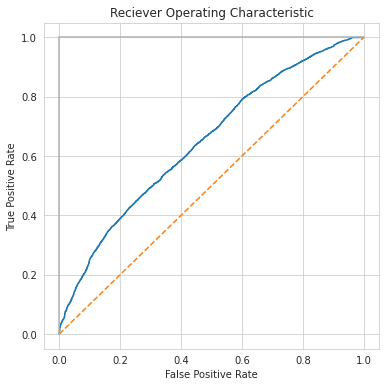

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_lgr.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [91]:
# calculate area under curve
roc_auc_lgr = roc_auc_score(y_test, Y_probabilities)
roc_auc_lgr

0.6475459736602571

### 5. XG Boast Classifier

In [93]:
## Instantiaitng the library
model_xgb= xgb.XGBClassifier(n_estimators=1000, random_state=1)

## Training the model using the train data
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
# predict the results using the test dataset
Y_pred_xgb = model_xgb.predict(X_test)

In [95]:
# Calculating and viewing the accuracy score for the decision tree model

accuracy=accuracy_score(Y_pred_xgb, y_test)
print('xgboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, Y_pred_xgb)*100))

xgboost Model accuracy score: 99.7067


In [96]:
# Calculating and viewing the precision score for the decision tree model

precision_xgb = precision_score(y_test, Y_pred_xgb, pos_label=1)
print('xgboost Model Precision score: {0:0.4f}'.format(precision_xgb*100))

xgboost Model Precision score: 99.6283


In [97]:
# Calculating and viewing the recall score for the decision tree model

recall_xgb = recall_score(y_test, Y_pred_xgb, pos_label= 1)
print('xgboost Model Recall score: {0:0.4f}'.format(recall_xgb*100))

xgboost Model Recall score: 99.7872


In [98]:
# Calculating and viewing the f1 score for the decision tree model

f1_score_xgb = f1_score(y_test, Y_pred_xgb, pos_label=1)
print('xgboost Model f1 score: {0:0.4f}'.format(f1_score_xgb*100))

xgboost Model f1 score: 99.7077


In [99]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces


cm_xgb = confusion_matrix(y_test, Y_pred_xgb)
print('Confusion matrix\n\n', cm_xgb)
print('\nTrue Positives(TP) = ', cm_xgb[1,1])
print('\nTrue Negatives(TN) = ', cm_xgb[0,0])
print('\nFalse Positives(FP) = ', cm_xgb[0,1])
print('\nFalse Negatives(FN) = ', cm_xgb[1,0])

Confusion matrix

 [[7452   28]
 [  16 7504]]

True Positives(TP) =  7504

True Negatives(TN) =  7452

False Positives(FP) =  28

False Negatives(FN) =  16


<AxesSubplot:>

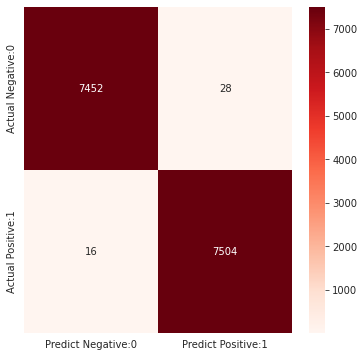

In [100]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
cm_xgb_matrix = pd.DataFrame(data=cm_xgb, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_xgb_matrix, annot=True, fmt='d', cmap=plt.cm.Reds)

In [101]:
## Viewing the classification report of the model

print(classification_report(y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7480
           1       1.00      1.00      1.00      7520

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



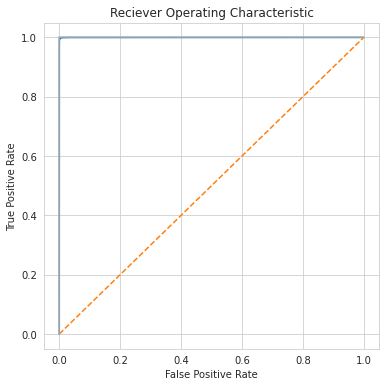

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
Y_probabilities = model_xgb.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_probabilities,pos_label = 1)

# plot ROC curve

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [103]:
# calculate area under curve
roc_auc_xgb = roc_auc_score(y_test, Y_probabilities)
roc_auc_xgb

0.9998834125042667

### Summary of Evaluation Metrics

### Step 1. Create Pandas Series for all the Matrices Used

#### Pandas Series for Accuracy Score

In [104]:
Accuracy_Score = {'Decision Tree': accuracy_score(y_test, Y_pred_dtc)*100, 'Logistic Regression': accuracy_score(y_test, Y_pred_lgr)*100, 'Light Gradient Boasitng Machine': accuracy_score(y_test, Y_pred_lgb)*100,
             'XG Boast Machine': accuracy_score(y_test, Y_pred_xgb)*100, 'Random Forest': accuracy_score(y_test, Y_pred_rf)*100}
Accuracy_Score = pd.Series(Accuracy_Score)
Accuracy_Score

Decision Tree                      94.953333
Logistic Regression                58.900000
Light Gradient Boasitng Machine    99.593333
XG Boast Machine                   99.706667
Random Forest                      98.880000
dtype: float64

#### Pandas Series for Precision Score

In [105]:
Precision_Score = {'Decision Tree': precision_dtc*100, 'Logistic Regression': precision_lgr*100, 'Light Gradient Boasitng Machine': precision_lgb*100,
             'XG Boast Machine': precision_xgb*100, 'Random Forest': precision_rf*100}
Precision_Score = pd.Series(Precision_Score)
Precision_Score

Decision Tree                      94.628481
Logistic Regression                57.520258
Light Gradient Boasitng Machine    99.640623
XG Boast Machine                   99.628253
Random Forest                      99.000267
dtype: float64

#### Pandas Series for Recall Score

In [106]:
Recall_Score = {'Decision Tree': recall_dtc*100, 'Logistic Regression': recall_lgr*100, 'Light Gradient Boasitng Machine': recall_lgb*100,
             'XG Boast Machine': recall_xgb*100, 'Random Forest': recall_rf*100}
Recall_Score = pd.Series(Recall_Score)
Recall_Score

Decision Tree                      95.345745
Logistic Regression                68.909574
Light Gradient Boasitng Machine    99.547872
XG Boast Machine                   99.787234
Random Forest                      98.763298
dtype: float64

#### Pandas Series for f1 Score

In [107]:
f1_Score = {'Decision Tree': f1_score_dtc*100, 'Logistic Regression': f1_score_lgr*100, 'Light Gradient Boasitng Machine': f1_score_lgb*100,
             'XG Boast Machine': f1_score_xgb*100, 'Random Forest': f1_score_rf*100}
f1_Score = pd.Series(f1_Score)
f1_Score

Decision Tree                      94.985759
Logistic Regression                62.701918
Light Gradient Boasitng Machine    99.594226
XG Boast Machine                   99.707680
Random Forest                      98.881640
dtype: float64

#### Pandas Series for ROC_AUC Score

In [108]:
ROC_AUC_Score = {'Decision Tree': roc_auc_dtc*100, 'Logistic Regression': roc_auc_lgr*100, 'Light Gradient Boasitng Machine': roc_auc_lgb*100,
             'XG Boast Machine': roc_auc_xgb*100, 'Random Forest': roc_auc_rf*100}
ROC_AUC_Score = pd.Series(ROC_AUC_Score)
ROC_AUC_Score

Decision Tree                      98.285022
Logistic Regression                64.754597
Light Gradient Boasitng Machine    99.990019
XG Boast Machine                   99.988341
Random Forest                      99.926188
dtype: float64

#### Pandas Series for the different models built

In [109]:
Models = {'Decision Tree': "Decison_Tree_Model", 'Logistic Regression': "Logistic_Regression_Model", 'Light Gradient Boasitng Machine': "LGBM_Model",
             'XG Boast Machine': "XGBM_Model", 'Random Forest': "Random_Forest_Model"}
Models = pd.Series(Models)
Models

Decision Tree                             Decison_Tree_Model
Logistic Regression                Logistic_Regression_Model
Light Gradient Boasitng Machine                   LGBM_Model
XG Boast Machine                                  XGBM_Model
Random Forest                            Random_Forest_Model
dtype: object

### Step 2. Concating all the series together to get a dataframe

In [110]:
cmm = pd.DataFrame({'Models':Models, 'Accuracy_Score': Accuracy_Score,'Precision_Score': Precision_Score,
                    'Recall_Score': Recall_Score,'f1_Score': f1_Score, 
                    'ROC_AUC_Score': ROC_AUC_Score})

### A DataFrame That Shows The Five (5) Models Built Against The Different Evalaution Matrices Used

In [111]:
cmm_df = cmm.reset_index(drop=True)
cmm_df

,Models,Accuracy_Score,Precision_Score,Recall_Score,f1_Score,ROC_AUC_Score
0,Decison_Tree_Model,94.953333,94.628481,95.345745,94.985759,98.285022
1,Logistic_Regression_Model,58.900000,57.520258,68.909574,62.701918,64.754597
2,LGBM_Model,99.593333,99.640623,99.547872,99.594226,99.990019
3,XGBM_Model,99.706667,99.628253,99.787234,99.707680,99.988341
4,Random_Forest_Model,98.880000,99.000267,98.763298,98.881640,99.926188
